# **Project Name : Inferential Statistical Analysis of Customer Purchase Behavior**

## **Project Summary:**
* This project explores customer purchasing behavior by applying inferential statistics on a structured retail dataset. Using hypothesis testing techniques, the study aims to determine if observed consumer trends—such as average spending across age groups or gender—are statistically valid or occur by chance.
* By analyzing average purchases and high-spending proportions within specific demographic groups (like men aged 18–25 or women spending over ₹10,000), this project helps verify common business assumptions and delivers actionable insights for targeted marketing strategies.
* The insights generated from this statistical investigation support evidence-based decision-making in retail marketing, pricing, and customer segmentation.

## **Problem Statement:**
Retail businesses often make assumptions about customer spending based on age and gender, such as “men aged 18–25 spend ₹10,000” or “35% of women spend over ₹10,000.” This project uses inferential statistics to test whether these assumptions are statistically valid or simply due to random variation, enabling more accurate, data-driven decisions.



## **Import Libraries**

In [50]:
#  Data manipulation and analysis
import pandas as pd
import numpy as np

#  Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing / Encoding
from sklearn.preprocessing import LabelEncoder

# Statistical Tests
from scipy.stats import ttest_1samp  # For one-sample t-test
from scipy.stats import ttest_ind    # For two-sample t-test

# Proportion Testing
from statsmodels.stats.proportion import proportions_ztest  # For z-test for two proportions and one proportion

## **Data Loading**

In [51]:
# Upload files from local system
from google.colab import files
uploaded=files.upload()

Saving purchase_data.csv to purchase_data (1).csv


In [52]:
# Load the dataset into a DataFrame
df=pd.read_csv('purchase_data.csv')

In [53]:
# Display the first few rows of the dataset
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


## **Data Cleaning & Exploratory Data Analysis**

In [54]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [55]:
# Unique values for Product_Category_1
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [56]:
# Unique values for Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [57]:
# Missing values
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,81514


Imputing with mean/mode will produce false data so instead we will fill with '0'.

In [58]:
# Fill NA with 0 in Product Categories
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [59]:
# Drop any remaining nulls
df.dropna(inplace=True)

In [60]:
# Check duplicates
print(df.duplicated().sum())

0


No duplicates row found

In [61]:
# Convert data types
df[['Product_Category_1','Product_Category_2','Product_Category_3','Marital_Status','Occupation']] = df[['Product_Category_1','Product_Category_2','Product_Category_3','Marital_Status','Occupation']].astype(int)

## **Outlier Detection and Removal (IQR Method)**

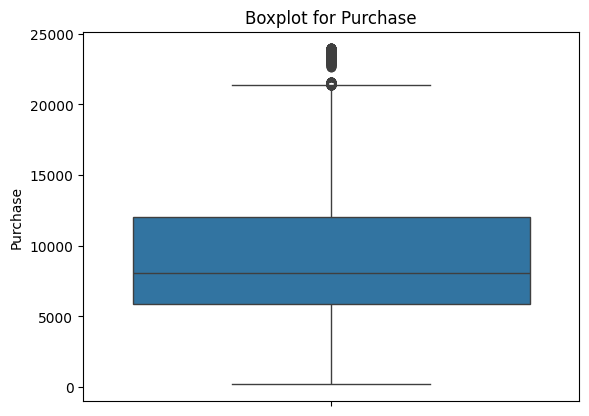

In [62]:
# Boxplot
sns.boxplot(df['Purchase'])
plt.title("Boxplot for Purchase")
plt.show()

Outliers distort the mean and standard deviation, violating normality assumptions and leading to misleading test statistics and p-values in inferential tests like the t-test.

In [63]:
# IQR method
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [64]:
# Remove outliers
df = df[(df['Purchase'] >= LL) & (df['Purchase'] <= UL)]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263009,1004473,P00296542,M,36-45,1,B,3,0,8,0,0,8061.0
263010,1004473,P00041942,M,36-45,1,B,3,0,5,18,0,3722.0
263011,1004473,P00115142,M,36-45,1,B,3,0,1,8,17,19253.0
263012,1004473,P00188442,M,36-45,1,B,3,0,5,7,0,3608.0


## **Label Encoding**

In [65]:
# Define the list of categorical columns to encode
cols = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Create an instance of LabelEncoder
le = LabelEncoder()

In [66]:
# Apply label encoding to each categorical column
for col in cols:
    df[col] = le.fit_transform(df[col])

We are encoding categorical variables into numeric variable which required for  statistical analysis.

# **Hypothesis Testing**

# Q1. Is the average purchase by men aged 18–25 equal to ₹10,000?

* Hypotheses:
* H0: μ = ₹10,000
* H1: μ != ₹10,000
* Test: One-sample t-test

In [67]:
# Filter the dataframe for male customers (Gender == 1) aged 18-25 (Age == 1)
new_df = df[(df['Gender'] == 1) & (df['Age'] == 1)]

In [68]:
# Take a random sample of 3600 records from this filtered data for hypothesis testing
Sample = new_df.sample(n=3600, random_state=5)

In [69]:
# Hypothesis test
t_stat, p_value = ttest_1samp(Sample['Purchase'], 10000)
print("P-value:", p_value)
print("T-statistic:", t_stat)

P-value: 1.7766468838738448e-09
T-statistic: -6.032597834091577


## Insight:
**We reject the null hypothesis, so the average purchase by men aged 18–25 is not equal to ₹10,000.**

## Q2. Is the proportion of men spending > ₹10,000 the same for age groups 18–25 and 26–35?
* Hypotheses:
* H0: p₁ = p₂
* H1: p₁!= p₂
* Test: Two-proportion Z-test

In [70]:
# Filter data for customers aged 18-25 with purchases greater than 10,000
data_age1 = df[(df['Age'] == 1) & (df['Purchase'] > 10000)]

# Filter data for customers aged 26-35 with purchases greater than 10,000
data_age2 = df[(df['Age'] == 2) & (df['Purchase'] > 10000)]


In [71]:
# Take a random sample of 1000 records from data_age1 for analysis consistency
sample_age1 = data_age1.sample(n=1000, random_state=0)

# Take a random sample of 1000 records from data_age2 for analysis consistency
sample_age2 = data_age2.sample(n=1000, random_state=0)


In [72]:
# Count number of males (Gender == 1) in each sample group
count = [(sample_age1['Gender'] == 1).sum(), (sample_age2['Gender'] == 1).sum()]

# Get total number of observations in each sample group
nobs = [len(sample_age1), len(sample_age2)]


In [73]:
# Perform Z-test for comparing two population proportions
stat, p_value = proportions_ztest(count, nobs)

# Print the Z-statistic and corresponding p-value
print("Z-stat:", stat)
print("P-value:", p_value)


Z-stat: -2.2118872069533757
P-value: 0.026974459416436024


# Insight:
**Since the p-value (0.026) is less than 0.05, we reject the null hypothesis and conclude that the proportion of men spending over ₹10,000 is significantly different between the age groups 18–25 and 26–35.**

# Q3. Is 35% of women spending more than ₹10,000?
* Hypotheses:
* H0: p = 0.35
* H1: p!= 0.35
* Test: One-proportion Z-test

In [74]:
# Filter dataset for women (Gender == 0)
women = df[df['Gender'] == 0]

# From women, select those with Purchase amount greater than 10,000 (high spenders)
high_spenders = women[women['Purchase'] > 10000]


In [75]:
# Count the number of women who are high spenders (Purchase > 10,000)
count = [len(high_spenders)]

# Total number of women in the dataset
nobs = [len(women)]


In [76]:
# Perform one-proportion Z-test to check if the proportion of women spending > 10,000 is 35%
stat, p_value = proportions_ztest(count, nobs, value=0.35)

# Print the Z-statistic and p-value from the test
print("Z-stat:", stat)
print("P-value:", p_value)


Z-stat: [-35.63182364]
P-value: [4.50600612e-278]


## Insight:
**The p-value is extremely small (much less than 0.05), we reject the null hypothesis and conclude that the proportion of women spending more than ₹10,000 is significantly different from 35%.**

# Q4. Is the average purchase same for men and women aged 18–25?
* Hypotheses:
* H0: μ₁ = μ₂
* H1: μ₁ != μ₂
* Test: Independent two-sample t-test

In [77]:
# Select data for men aged 18-25
men = df[(df['Gender'] == 1) & (df['Age'] == 1)]

# Select data for women aged 18-25
women = df[(df['Gender'] == 0) & (df['Age'] == 1)]


In [78]:
# Take a random sample of 500 purchase values from men aged 18-25
s1 = men['Purchase'].sample(n=500, random_state=1)

# Take a random sample of 500 purchase values from women aged 18-25
s2 = women['Purchase'].sample(n=500, random_state=1)


In [79]:
# Perform independent two-sample t-test to compare average purchases between men and women aged 18-25
t_stat, p_value = ttest_ind(s1, s2)

# Print the t-statistic and p-value to evaluate if the difference in means is significant
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 2.3545678647236374
P-value: 0.01873717570882957


## Insight:
**The p-value (0.018) is less than 0.05, we reject the null hypothesis and conclude that the average purchase amounts of men and women aged 18–25 are significantly different.**

# **Business Conclusion:**
* This project helped us understand how different people shop by using real data and inferential statistical analysis. Here’s what we found:

* Men aged 18–25 do not actually spend exactly ₹10,000 on average. So, if businesses are planning offers or strategies based on that number, they may not be correct.

* The number of men spending more than ₹10,000 is not the same in the age groups 18–25 and 26–35. This means that people spend differently based on age, and businesses should create different plans for different age groups.

* It is not true that 35% of women spend more than ₹10,000. The actual number is very different, so using 35% as a fixed value could lead to wrong marketing decisions.

* Men and women aged 18–25 do not spend the same on average. Their spending is different, so offers or ads should be customized based on gender too.

